In [2]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.astype('float') / 255
x_test = x_test.astype('float') / 255

In [5]:
x_train = x_train.reshape((len(x_train),-1))
x_test = x_test.reshape((len(x_test),-1))
print x_train.shape, x_test.shape

(60000, 784) (10000, 784)


In [6]:
def show_ae_result(autoencoder):
    decoded_imgs = autoencoder.predict(x_test)
    n = 10
    plt.figure(figsize=(20, 4))

    for i in xrange(1,n):
        ax = plt.subplot(2, n, i)
        plt.imshow( x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i+n)
        plt.imshow( decoded_imgs[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## simple 1-layer AE

In [15]:
input_img = Input( shape=(784,) )
encode = Dense(output_dim=32, activation='relu')(input_img)
decoded = Dense(output_dim=784, activation='sigmoid')(encode)
ae1 = Model(input=input_img, output=decoded)

# or just use sequential:
ae1 = Sequential([
        Dense(input_dim=784, output_dim=32, activation='relu'),
        Dense(784, activation='sigmoid')], 
        name='one-layer AE')

In [16]:
ae1.compile(optimizer='adadelta', loss='binary_crossentropy')

In [17]:
ae1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_9 (Dense)                  (None, 32)            25120       dense_input_3[0][0]              
____________________________________________________________________________________________________
dense_10 (Dense)                 (None, 784)           25872       dense_9[0][0]                    
Total params: 50992
____________________________________________________________________________________________________


In [18]:
ae1.fit(x=x_train, y=x_train,
                batch_size=32, nb_epoch=10,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s - loss: 0.2447 - val_loss: 0.1858
Epoch 2/10
60000/60000 [==============================] - 5s - loss: 0.1697 - val_loss: 0.1542
Epoch 3/10
60000/60000 [==============================] - 5s - loss: 0.1460 - val_loss: 0.1361
Epoch 4/10
60000/60000 [==============================] - 5s - loss: 0.1309 - val_loss: 0.1235
Epoch 5/10
60000/60000 [==============================] - 5s - loss: 0.1202 - val_loss: 0.1145
Epoch 6/10
60000/60000 [==============================] - 5s - loss: 0.1129 - val_loss: 0.1085
Epoch 7/10
60000/60000 [==============================] - 5s - loss: 0.1080 - val_loss: 0.1046
Epoch 8/10
60000/60000 [==============================] - 5s - loss: 0.1046 - val_loss: 0.1017
Epoch 9/10
60000/60000 [==============================] - 5s - loss: 0.1023 - val_loss: 0.0997
Epoch 10/10
60000/60000 [==============================] - 5s - loss: 0.1006 - val_loss: 0.0983

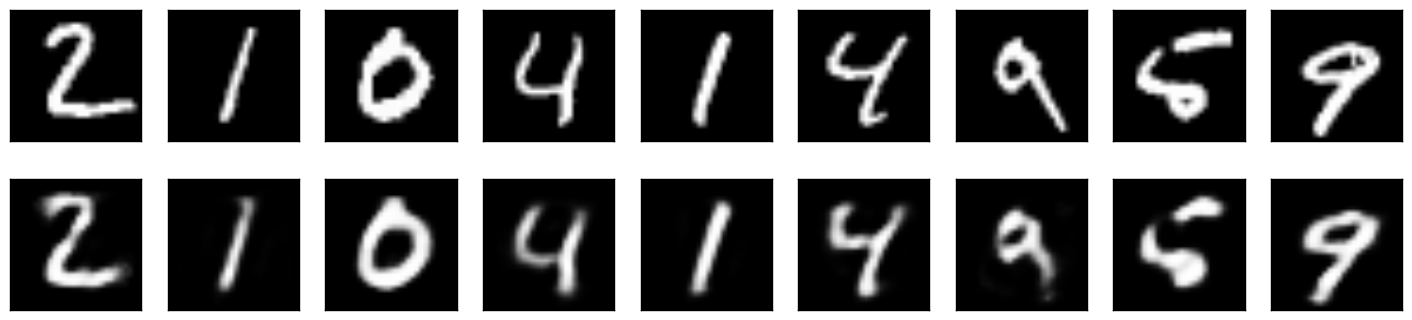

In [19]:
show_ae_result(ae1)

## add L1 regularization (sparse) to AE

In [7]:
from keras import regularizers
ae2 = Sequential([
        Dense(input_dim=784, output_dim=32, activation='relu', activity_regularizer=regularizers.activity_l1(10e-6)),
        Dense(784, activation='sigmoid')], 
        name='one-layer AE with L1 regularization')

In [8]:
ae2.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
ae2.fit(x=x_train, y=x_train,
                batch_size=32, nb_epoch=10,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s - loss: 0.2711 - val_loss: 0.1965
Epoch 2/10
60000/60000 [==============================] - 5s - loss: 0.1973 - val_loss: 0.1666
Epoch 3/10
60000/60000 [==============================] - 5s - loss: 0.1768 - val_loss: 0.1531
Epoch 4/10
60000/60000 [==============================] - 5s - loss: 0.1665 - val_loss: 0.1455
Epoch 5/10
60000/60000 [==============================] - 5s - loss: 0.1604 - val_loss: 0.1406
Epoch 6/10
60000/60000 [==============================] - 5s - loss: 0.1559 - val_loss: 0.1367
Epoch 7/10
60000/60000 [==============================] - 6s - loss: 0.1521 - val_loss: 0.1333
Epoch 8/10
60000/60000 [==============================] - 6s - loss: 0.1489 - val_loss: 0.1303
Epoch 9/10
60000/60000 [==============================] - 6s - loss: 0.1462 - val_loss: 0.1282
Epoch 10/10
60000/60000 [==============================] - 6s - loss: 0.1443 - val_loss: 0.1268

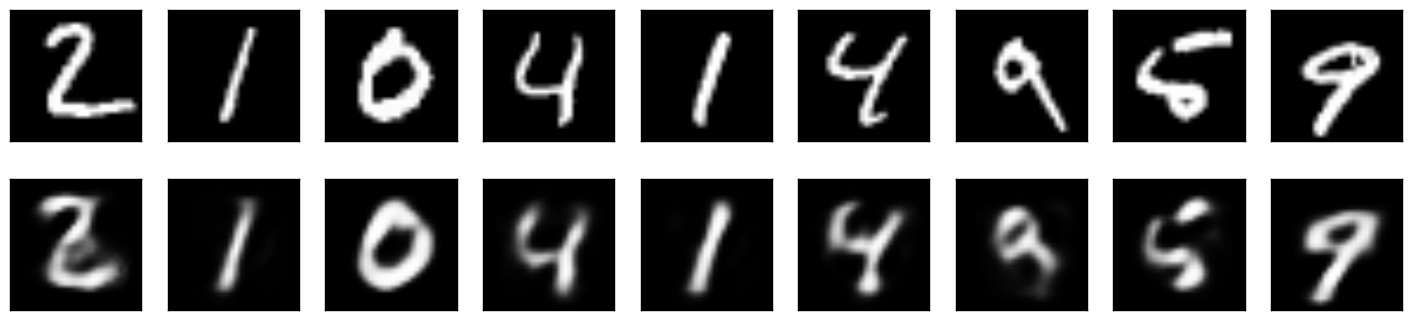

In [10]:
show_ae_result(ae2)